# This notebook provides the commands needed to read in an NWB file with data from one day of one animal (Animal Bond, day 4) and to copy the relevant metadata into a DataJoint Schema designed to mimic NWB structure

## The following steps must be completed before running this notebook:
### 1) Set up access to a DataJoint database. See https://tutorials.datajoint.io/
### 2) Install pynwb. 
    See https://pynwb.readthedocs.io/en/stable/getting_started.html#installation
### 3) Install the franklabnwb package. This can currently be downloaded from 
     https://bitbucket.org/franklab/franklabnwb/src/master/
### 4) Download the example franklab NWB file from DropBox. 
    https://www.dropbox.com/s/j4mr7riyhkar7gp/bon04.nwb?dl=0

#### Make sure we're in the franklabnwb/franklabnwb directory. 
#### Eventually this will be unnecessary because the package will properly installed

In [1]:
cd ../franklabnwb

/Users/loren/Src/NWB/franklabnwb/franklabnwb


#### Load all of the relevant modules

In [5]:
%load_ext autoreload
%autoreload 2


import pynwb

import os

#DataJoint and DataJoint schema
import datajoint as dj
import nwb_dj
import session
import ephys
import device
import lab
import task
import behav
import interval
import region

import createprobes


#franklabnwb functions
from franklabnwb import fl_ns_path
import franklabnwb.nspike_helpers as ns
import franklabnwb.query_helpers as qu
import franklabnwb.fl_extension as fle
import franklabnwb.fl_extension as flh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Populate the probe schema and check that it worked. You should see entries in the probe table corresponding to different probe types

In [6]:

createprobes.add_probes()
device.Probe()

testing


probe_type,probe_description description of this probe,num_shanks number of shanks on this device,contact_side_numbering electrode numbers from contact side of the device
32c-2s8mm6cm-20um-40um-dl,32 channel polymide probe,2,1
tetrode,tetrode made from 4 12.5 um nichrome wires,1,1


#### Next we specify the NWB file name and populate the rest of the schema
#### Replace the code below with the text for the path to the NWB file

In [4]:
nwb_file_name = '/data/mkarlsso/Bon/NWB/bon04.nwb'

In [5]:
nwb_dj.NWBPopulate([nwb_file_name])

file names: ['/data/mkarlsso/Bon/NWB/bon04.nwb']
Starting NWB file /data/mkarlsso/Bon/NWB/bon04.nwb
Skipping task Sleep; already in schema

Skipping task W-Alternation; already in schema

Skipping apparatus Sleep Box; already in schema

Skipping apparatus TrackA; already in schema

Skipping apparatus TrackB; already in schema



#### The code below creates a diagram of the various schema and their relationships

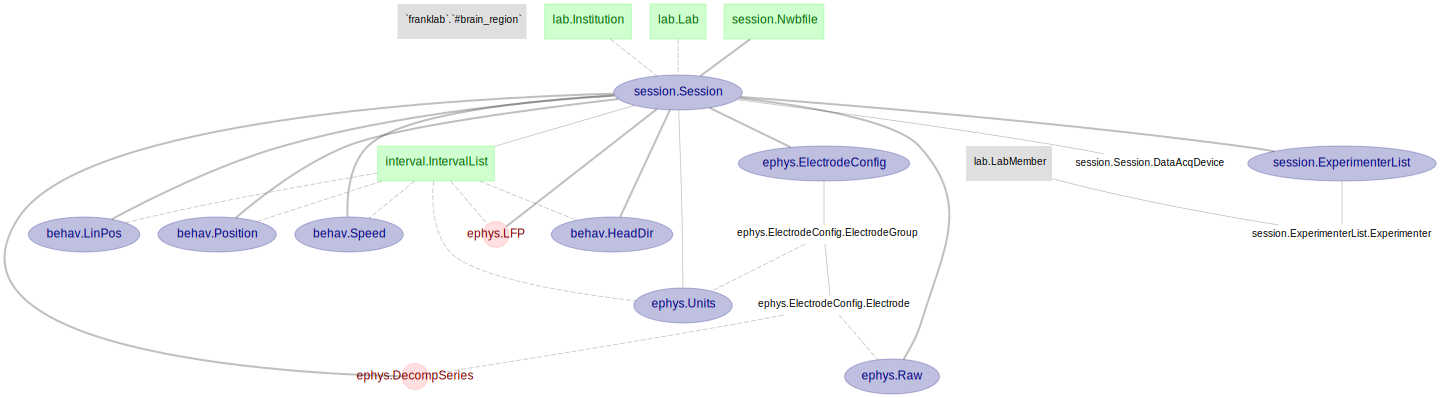

In [6]:
dj.Diagram(ephys)+dj.Diagram(session)+dj.Diagram(lab)+dj.Diagram(interval)+dj.Diagram(behav)

In [35]:
#### And now that we have the data in DataJoint, we can do queries to find time intervals we might be interested in
#### In the example below, we get all of the intervals where the task_name was sleep.

In [7]:
sleep_intervals = (interval.IntervalList() & (task.TaskEpoch() & 'task_name = "Sleep"')).fetch()
sleep_intervals

array([('/data/mkarlsso/Bon/NWB/bon03.nwb', 'task epoch 0', array([1.13614807e+09, 1.13614919e+09])),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', 'task epoch 2', array([1.13615033e+09, 1.13615109e+09])),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', 'task epoch 4', array([1.13615223e+09, 1.13615314e+09])),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', 'task epoch 6', array([1.13615446e+09, 1.13615566e+09])),
       ('/data/mkarlsso/Bon/NWB/bon04.nwb', 'task epoch 0', array([1.13614661e+09, 1.13614794e+09])),
       ('/data/mkarlsso/Bon/NWB/bon04.nwb', 'task epoch 2', array([1.13614908e+09, 1.13615003e+09])),
       ('/data/mkarlsso/Bon/NWB/bon04.nwb', 'task epoch 4', array([1.13615118e+09, 1.13615241e+09])),
       ('/data/mkarlsso/Bon/NWB/bon04.nwb', 'task epoch 6', array([1.13615411e+09, 1.13615495e+09]))],
      dtype=[('nwb_file_name', 'O'), ('interval_name', 'O'), ('valid_times', 'O')])

In [8]:
sleep_intervals['valid_times']

array([array([1.13614807e+09, 1.13614919e+09]),
       array([1.13615033e+09, 1.13615109e+09]),
       array([1.13615223e+09, 1.13615314e+09]),
       array([1.13615446e+09, 1.13615566e+09]),
       array([1.13614661e+09, 1.13614794e+09]),
       array([1.13614908e+09, 1.13615003e+09]),
       array([1.13615118e+09, 1.13615241e+09]),
       array([1.13615411e+09, 1.13615495e+09])], dtype=object)

In [7]:
ephys.ElectrodeConfig.ElectrodeGroup().fetch()

array([('/data/mkarlsso/Bon/NWB/bon03.nwb', '01', 1, 'NSpike acquisition system', 'tetrode 1 located in CA3 on day 3', 'Right'),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', '02', 1, 'NSpike acquisition system', 'tetrode 2 located in CA3 on day 3', 'Right'),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', '03', 2, 'NSpike acquisition system', 'tetrode 3 located in CA1 on day 3', 'Right'),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', '04', 2, 'NSpike acquisition system', 'tetrode 4 located in CA1 on day 3', 'Right'),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', '05', 2, 'NSpike acquisition system', 'tetrode 5 located in CA1 on day 3', 'Right'),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', '06', 3, 'NSpike acquisition system', 'tetrode 6 located in ? on day 3', 'Right'),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', '07', 1, 'NSpike acquisition system', 'tetrode 7 located in CA3 on day 3', 'Right'),
       ('/data/mkarlsso/Bon/NWB/bon03.nwb', '08', 1, 'NSpike acquisition system', 'tetrode 8 locate

In [7]:
ephys.ElectrodeConfig.drop()

`ephys`.`_electrode_config` (0 tuples)
`ephys`.`_electrode_config__electrode_group` (0 tuples)
`ephys`.`_units` (0 tuples)
`ephys`.`_electrode_config__electrode` (0 tuples)
`ephys`.`_raw` (0 tuples)
`ephys`.`__l_f_p` (0 tuples)
`ephys`.`__decomp_series` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [8]:
region.BrainRegion.drop()
session.Session.drop()

`region`.`#brain_region` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.
`session`.`_session` (0 tuples)
`session`.`_session__data_acq_device` (0 tuples)
`franklab`.`interval_list` (0 tuples)
`task`.`_task_epoch` (0 tuples)
`behav`.`_speed` (0 tuples)
`behav`.`_position` (0 tuples)
`behav`.`_lin_pos` (0 tuples)
`behav`.`_head_dir` (0 tuples)
`session`.`_experimenter_list` (0 tuples)
`session`.`_experimenter_list__experimenter` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [9]:
device.Device.drop()
device.Probe.drop()

`device`.`device` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.
`device`.`probe` (2 tuples)
`device`.`probe__shank` (3 tuples)
`device`.`probe__electrode` (36 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.
